In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as dates
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk 
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
plt.rcParams["figure.figsize"] = (20,10)
pd.set_option('display.max_columns', None)

In [52]:
pip install --upgrade scipy

Признаки:
*   satisfaction_level​ - Уровень удовлетворенности работой
*   Last_evaluation ​- Время с момента последней оценки в годах
*   number_projects​ - Количество проектов, выполненных за время работы
*   average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
*   time_spend_company​ - Стаж работы в компании в годах
*   work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
*   left​ - уволился ли сотрудник
*   promotion_last_5years​ - повышался ли сотрудник за последние пять лет
*   department ​- отдел в котором работает сотрудник
*   salary​ - относительный уровень зарплаты

In [53]:
#Задание 1
#Загрузите файл HR.csv в pandas dataframe
df_HR = pd.read_csv('https://drive.google.com/u/0/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1&export=download')
df_HR = df_HR.astype({"promotion_last_5years": bool}) #иначе считаются кривые метрики, типа средних и т.д.
df_HR = df_HR.astype({"left": bool}) #иначе считаются кривые метрики, типа средних и т.д.
df_HR.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,True,False,sales,low
1,0.80,0.86,5,262,6,0,True,False,sales,medium
2,0.11,0.88,7,272,4,0,True,False,sales,medium
3,0.72,0.87,5,223,5,0,True,False,sales,low
4,0.37,0.52,2,159,3,0,True,False,sales,low


In [54]:
#Задание 2
#Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
df_HR.describe(include='all') #50% = медиана; top - мода

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,False,False,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,11428,14680,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,NaN,NaN,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,NaN,NaN,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,NaN,NaN,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,NaN,NaN,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,NaN,NaN,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,NaN,NaN,NaN,NaN


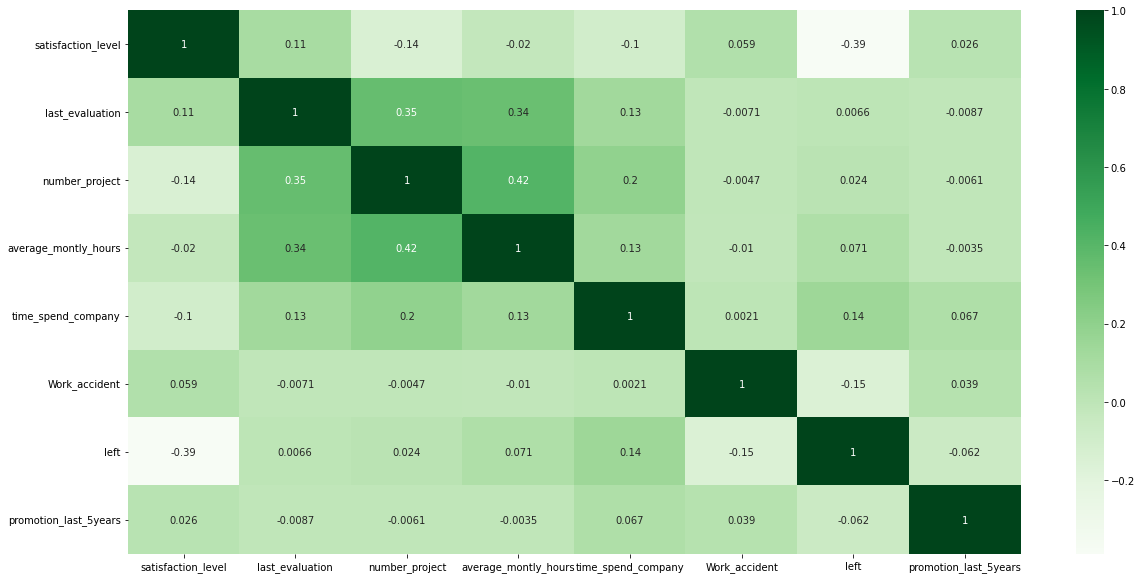


Две самые скоррелированные переменные: "Среднее количество часов на рабочем месте в месяц" и "Количество проектов, выполненных за время работы" 

Две наименее скоррелированные переменные, как ни странно: "Происходили ли несчастные случаи на рабочем месте с сотрудником" и "Стаж работы в компании в годах" 


In [55]:
#Задание 3
#Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.
#Определите две самые скоррелированные и две наименее скоррелированные переменные.
corr = df_HR.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap="Greens",annot=True)
plt.show()
print(f'\nДве самые скоррелированные переменные: "Среднее количество часов на рабочем месте в месяц" и "Количество проектов, выполненных за время работы" ')
print(f'\nДве наименее скоррелированные переменные, как ни странно: "Происходили ли несчастные случаи на рабочем месте с сотрудником" и "Стаж работы в компании в годах" ')

In [56]:
#Задание 4
#Рассчитайте сколько сотрудников работает в каждомдепартаменте.
df_workers_department = df_HR.groupby(df_HR.department).size().reset_index(name='Worker counts').copy()
df_workers_department.head(10)

,department,Worker counts
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


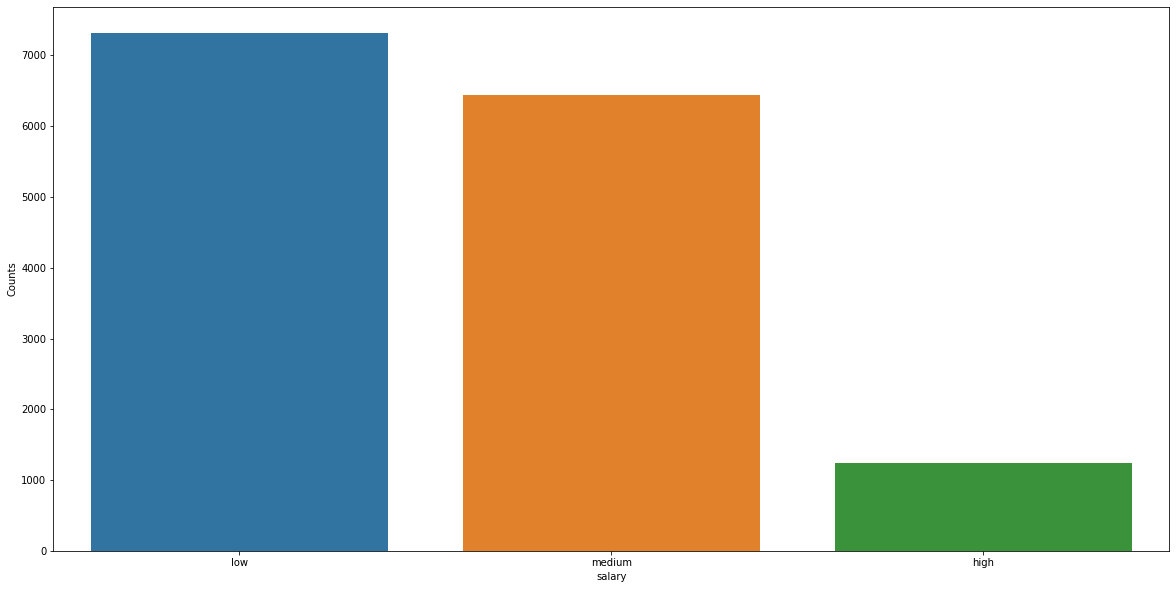

In [57]:
#Задание 5
#Показать распределение сотрудников по зарплатам.
df_workers_salary = df_HR.groupby(df_HR.salary).size().reset_index(name='Counts').copy()
sns.barplot(df_workers_salary.salary, df_workers_salary.Counts, order=['low','medium','high'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


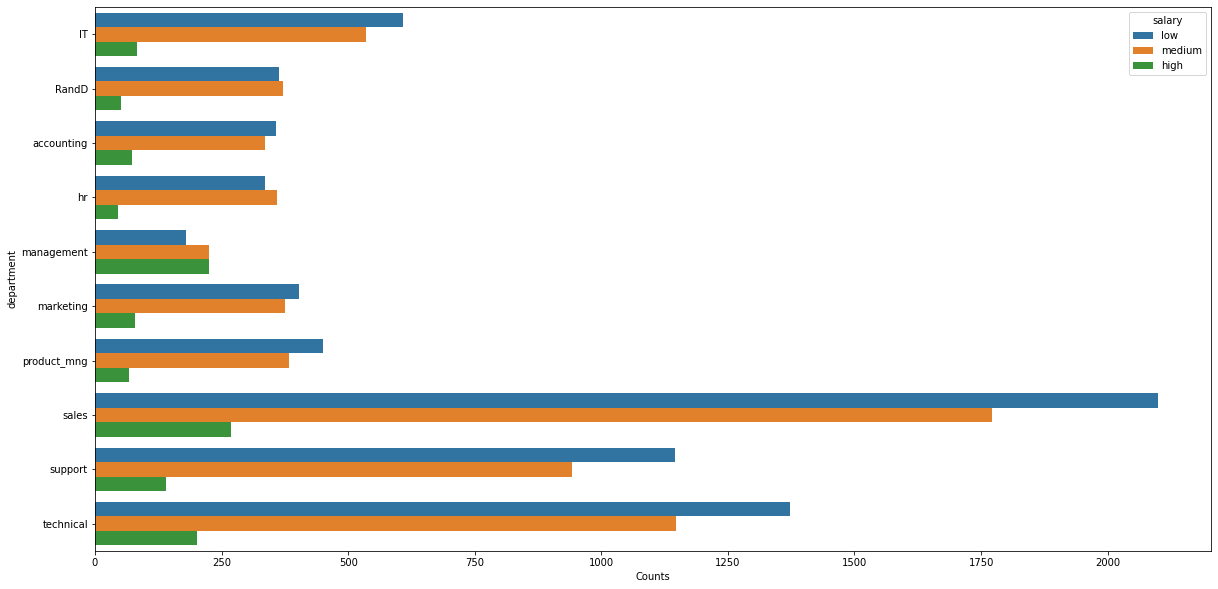

In [58]:
#Задание 6
#Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
df_workers_salary_in_department = df_HR.groupby([df_HR.department , df_HR.salary]).size().reset_index(name='Counts').copy()
#df_workers_salary_in_department.head(30)
sns.barplot( df_workers_salary_in_department.Counts,df_workers_salary_in_department.department, hue=df_workers_salary_in_department.salary,hue_order=['low','medium','high'])

In [59]:
#Задание 7
#Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
df_salary_and_time = df_HR[["salary","average_montly_hours"]].copy()
df_salary_and_time = df_salary_and_time[df_salary_and_time.salary!='medium']
alfa = 0.05
df_low = df_salary_and_time[df_salary_and_time.salary=='low']
df_high = df_salary_and_time[df_salary_and_time.salary=='high']
result = stats.ttest_ind(df_low['average_montly_hours'], df_high['average_montly_hours'], equal_var = False)
print(df_low['average_montly_hours'].mean())
print(df_high['average_montly_hours'].mean())
print(result)
if result.pvalue<alfa:
  print('Отвергаем нулевую гипотезу. Сотрудники с высоким окладом проводят на работе отличное время, от сотрудников с низким окладом')
else:
  print('Не отвергаем нулевую гипотезу. Сотрудники с высоким окладом проводят на работе столько же время как и сотрудники с низким окладом')

200.9965828321487
199.86742118027485
Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу. Сотрудники с высоким окладом проводят на работе столько же время как и сотрудники с низким окладом


In [60]:
#Задание 8
#Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
#●Доля сотрудников с повышением за последние 5 лет
#●Средняя степень удовлетворенности
#●Среднее количество проектов
df_leftstay = df_HR[['promotion_last_5years','satisfaction_level','number_project']].groupby([df_HR.left]).mean().reset_index().copy()
df_leftstay['promotion_last_5years'] = df_leftstay['promotion_last_5years']*100
df_leftstay.columns = ['Ушли из компании','Доля сотрудников с повышением за последние 5 лет', 'Средняя степень удовлетворенности','Среднее количество проектов']
df_leftstay.head()

,Ушли из компании,Доля сотрудников с повышением за последние 5 лет,Средняя степень удовлетворенности,Среднее количество проектов
0,False,2.625131,0.666810,3.786664
1,True,0.532064,0.440098,3.855503


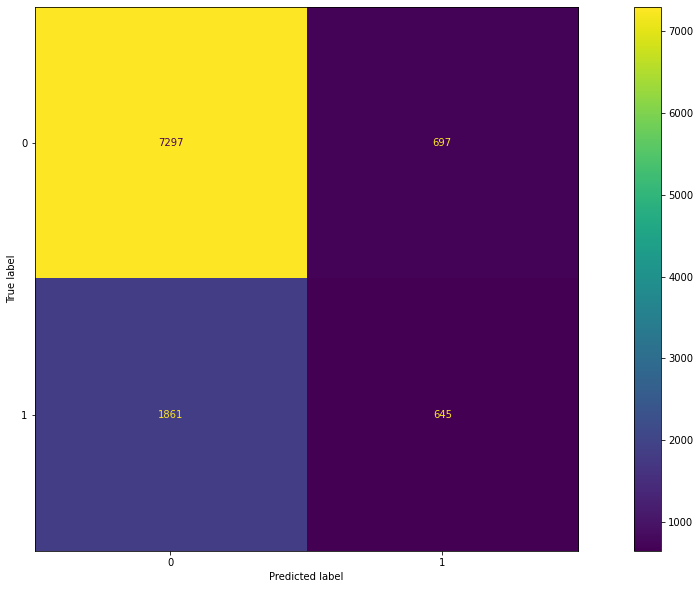

Хорошо оценивает останется ли человек, но плохо предсказывает, что человек уйдет.


In [62]:
#Задание 9
#Разделить данные на тестовую и обучающую выборки
#Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary)
#Оценить качество модели на тестовой выборки
df_HR_for_LDA = df_HR.copy()
df_HR_for_LDA.drop('department', axis=1, inplace=True)
df_HR_for_LDA.drop('salary', axis=1, inplace=True)
df_HR_for_LDA.head(10)
df_HR_left = df_HR_for_LDA[['left']].copy()
df_HR_for_LDA.drop('left', axis=1, inplace=True)

lda = LinearDiscriminantAnalysis()
X_train, X_test, y_train, y_test = train_test_split(df_HR_for_LDA,df_HR_left.left,test_size=0.7, random_state = 42) 
lda.fit(X_train,y_train)
y_predict = lda.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(f'Хорошо оценивает останется ли человек, но плохо предсказывает, что человек уйдет.')